In [2]:
# Load the autoreload extension
%load_ext autoreload

# Automatically reload modules before executing code
%autoreload 2

# Row Similarity Plots

In [24]:
from pathlib import Path
from benchmark_src.results_processing import create_plots
from benchmark_src.results_processing.plots.plot_utils import get_task_df, get_list_of_all_runs
from benchmark_src.results_processing.plots import row_similarity_plots
from benchmark_src.results_processing import ranking   


In [9]:
results_folder = Path("../../results")
assert results_folder.exists(), f"Could not find results folder at {results_folder}"

row_sim_plots_folder = results_folder / "plots" / "row_similarity"
row_sim_plots_folder.mkdir(exist_ok=True)

In [11]:
task_df = get_task_df(results_folder=results_folder, task_name="row_similarity_search")

Got unique approaches: ['GritLM' 'hytrel' 'sentence_transformer']
Unique datasets (row_similarity_search): 9


## Configure which approaches to include

In [17]:
# get list as ouptput and copy it to the next cell to comment out approaches not to be plotted
get_list_of_all_runs(task_df)

include_runs = [
    ('GritLM', 'embedding_model=GritLM_GritLM-7B'),
    ('hytrel', 'hytrel'),
    ('sentence_transformer', 'embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100'),
    ('sentence_transformer', 'embedding_model=all-MiniLM-L6-v2,table_row_limit=100'),
    ('sentence_transformer', 'embedding_model=ibm-granite_granite-embedding-30m-english,table_row_limit=100'),
    ('sentence_transformer', 'embedding_model=ibm-granite_granite-embedding-english-r2,table_row_limit=100'),
]


In [54]:
include_runs = [
    ('GritLM', 'embedding_model=GritLM_GritLM-7B'),
    ('hytrel', 'hytrel'),
    ('sentence_transformer', 'embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100'),
    ('sentence_transformer', 'embedding_model=all-MiniLM-L6-v2,table_row_limit=100'),
    ('sentence_transformer', 'embedding_model=ibm-granite_granite-embedding-30m-english,table_row_limit=100'),
    ('sentence_transformer', 'embedding_model=ibm-granite_granite-embedding-english-r2,table_row_limit=100'),
]

In [55]:
# Use the list to filter the original task_df
filtered_task_df = task_df[
    task_df.set_index(['Approach', 'Configuration']).index.isin(include_runs)
]

In [56]:
#filtered_task_df

## Overview over the results -> num datasets per approach we have results for

In [57]:
# overview
filtered_task_df.groupby(['task', 'Approach', 'Configuration'])['dataset'].nunique().reset_index(name='num_datasets')

,task,Approach,Configuration,num_datasets
0,row_similarity_search,GritLM,embedding_model=GritLM_GritLM-7B,9
1,row_similarity_search,hytrel,hytrel,9
2,row_similarity_search,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_ro...",9
3,row_similarity_search,sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_lim...",9
4,row_similarity_search,sentence_transformer,embedding_model=ibm-granite_granite-embedding-...,9
5,row_similarity_search,sentence_transformer,embedding_model=ibm-granite_granite-embedding-...,9


## Results averaged over the datasets

############## Started row sim barplot
               Approach                                      Configuration  \
0                GritLM                   embedding_model=GritLM_GritLM-7B   
1                hytrel                                             hytrel   
2  sentence_transformer  embedding_model=BAAI_bge-base-en-v1.5,table_ro...   
3  sentence_transformer  embedding_model=all-MiniLM-L6-v2,table_row_lim...   
4  sentence_transformer  embedding_model=ibm-granite_granite-embedding-...   
5  sentence_transformer  embedding_model=ibm-granite_granite-embedding-...   

                    task  MRR_mean_mean  MRR_mean_std  # Runs_mean  \
0  row_similarity_search       0.751648      0.258760          1.0   
1  row_similarity_search       0.089473      0.044056          1.0   
2  row_similarity_search       0.725434      0.290728          1.0   
3  row_similarity_search       0.660990      0.317439          1.0   
4  row_similarity_search       0.705146      0.328279          1

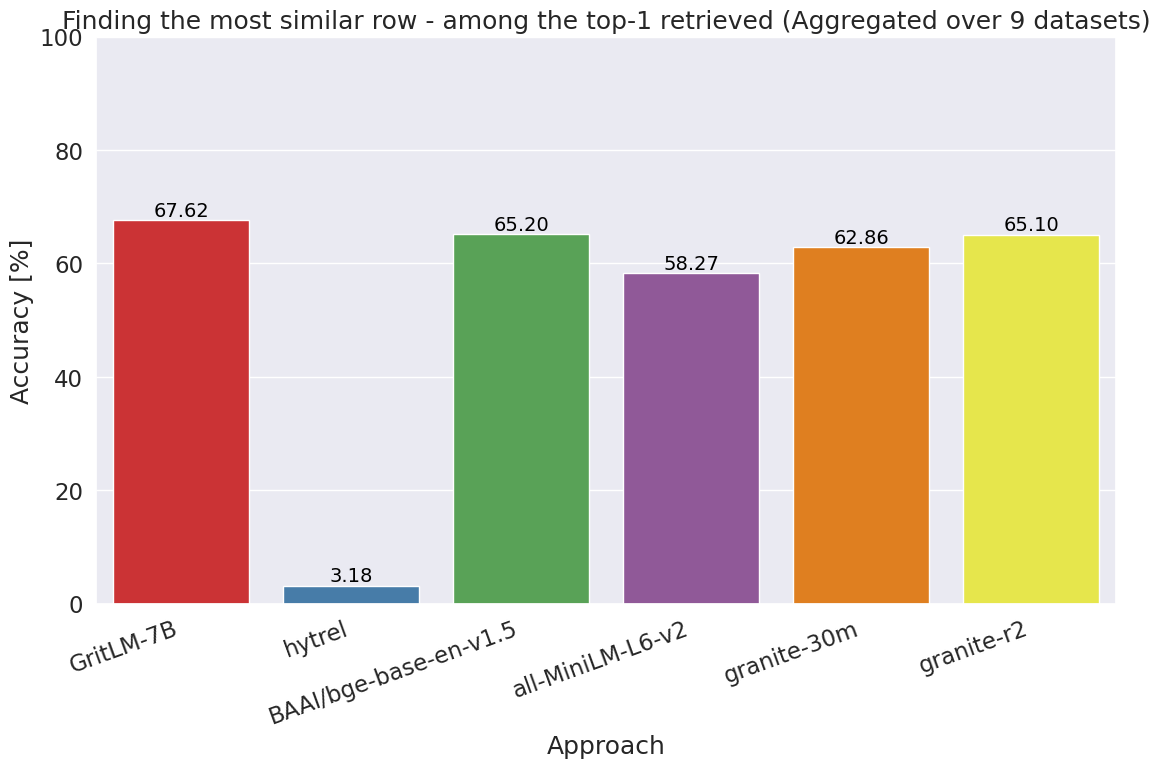

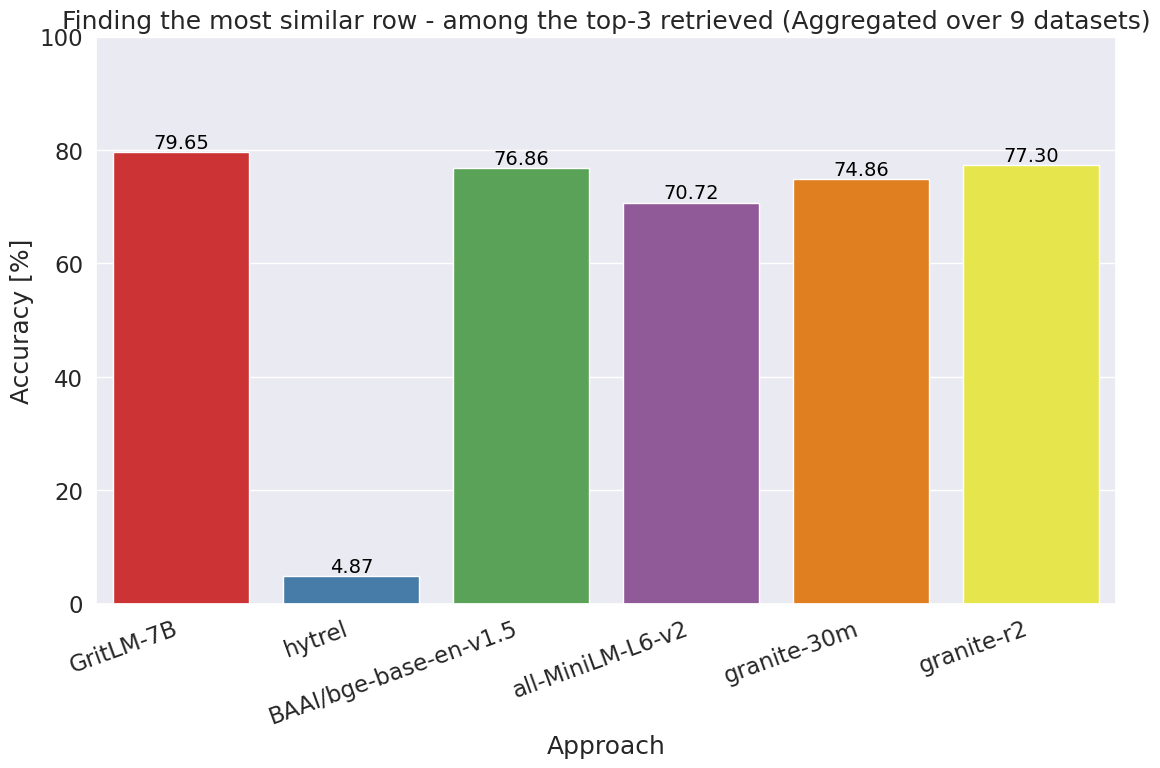

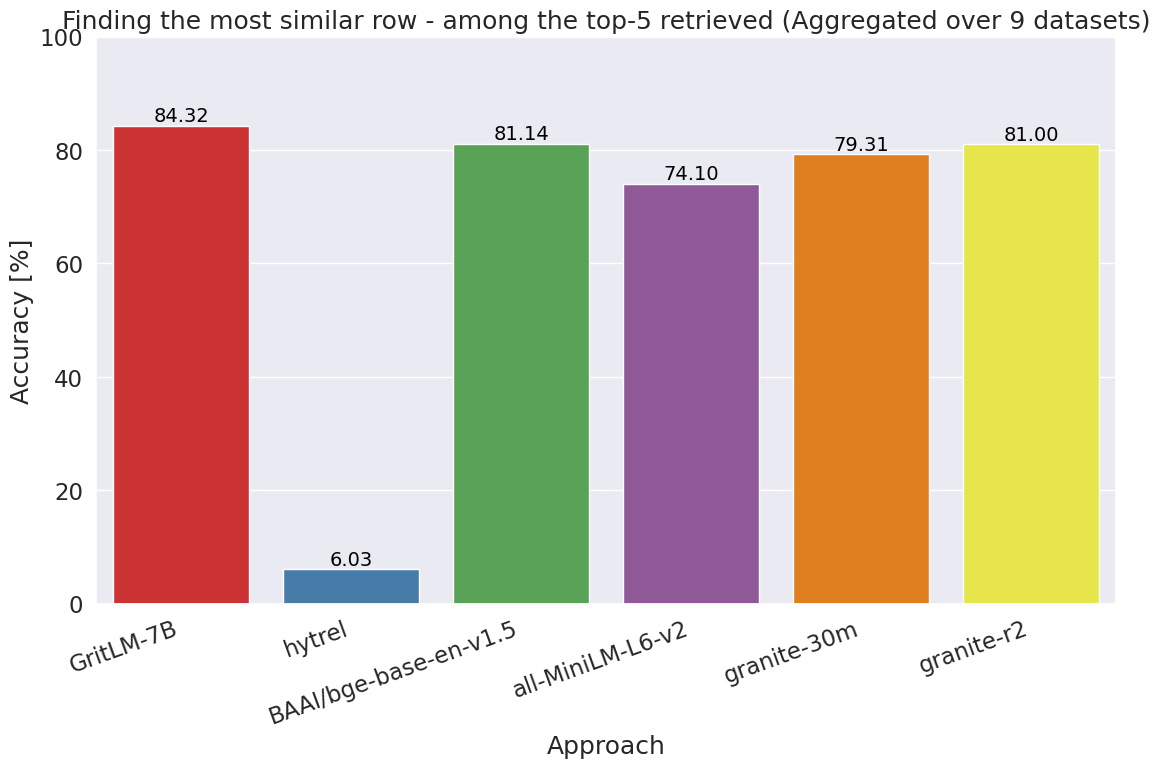

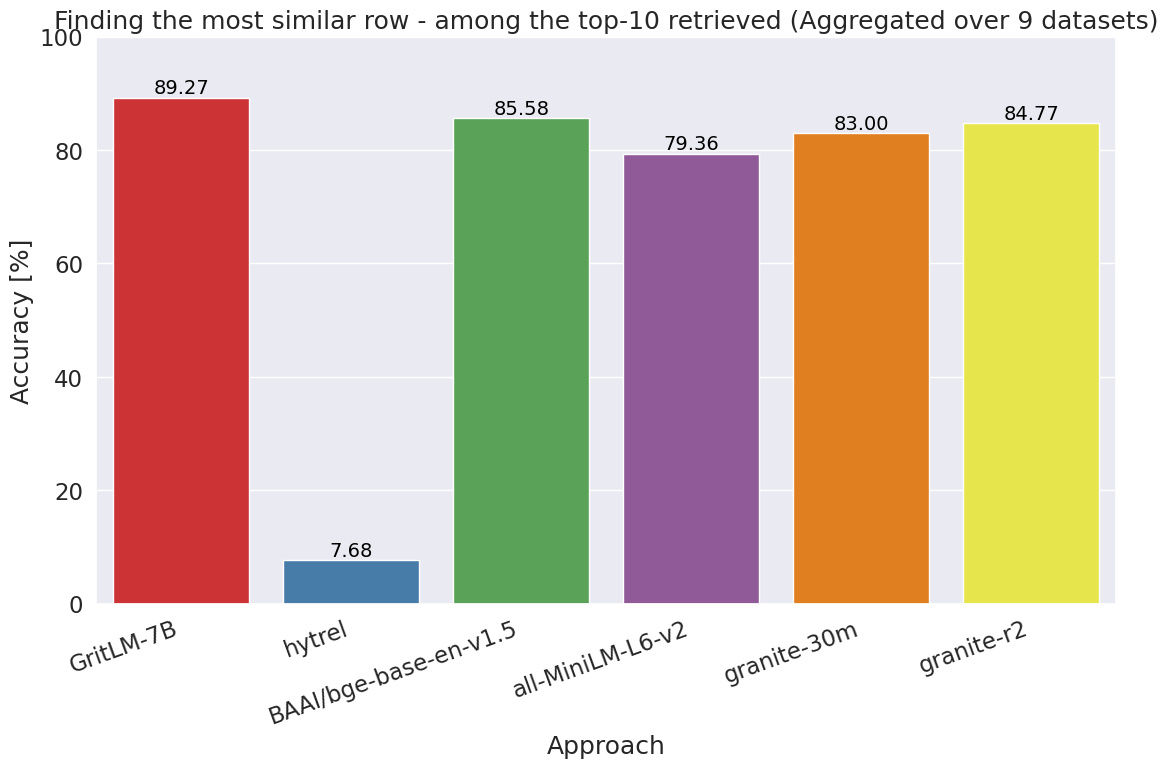

In [60]:
row_similarity_plots.create_barplot(df=filtered_task_df, results_folder=row_sim_plots_folder)


## Average rank and num best datasets

In [82]:
dataset_dominance_df = ranking.compute_dominance_and_avg_rank(filtered_task_df)
# sort by "num_datasets_best"
dataset_dominance_df = dataset_dominance_df.sort_values(by='avg_rank', ascending=True)
dataset_dominance_df.style

,task,Approach,Configuration,num_datasets_best,num_datasets_sole_best,datasets_sole_best,avg_rank
5,row_similarity_search,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-english-r2,table_row_limit=100",5,2,"['Amazon-Google', 'Walmart-Amazon']",1.666667
0,row_similarity_search,GritLM,embedding_model=GritLM_GritLM-7B,5,3,"['MusicBrainz', 'geological-settlements', 'iTunes-Amazon']",2.222222
4,row_similarity_search,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-30m-english,table_row_limit=100",3,1,['DBLP-GoogleScholar'],2.333333
2,row_similarity_search,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100",2,0,[],2.666667
3,row_similarity_search,sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_limit=100",0,0,[],4.555556
1,row_similarity_search,hytrel,hytrel,0,0,[],6.000000


## Bar plots per dataset

############## Started row sim barplot datasets


/mnt/labstore/lvogel/table-representation-evals/benchmark_src/results_processing/plots/row_similarity_plots.py:581: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')
/mnt/labstore/lvogel/table-representation-evals/benchmark_src/results_processing/plots/row_similarity_plots.py:581: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')
/mnt/labstore/lvogel/table-representation-evals/benchmark_src/results_processing/plots/row_similarity_plots.py:581: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')
/mnt/labstore/lvogel/table-representation-evals/benchmark_src/re

############## Finished row sim barplot datasets


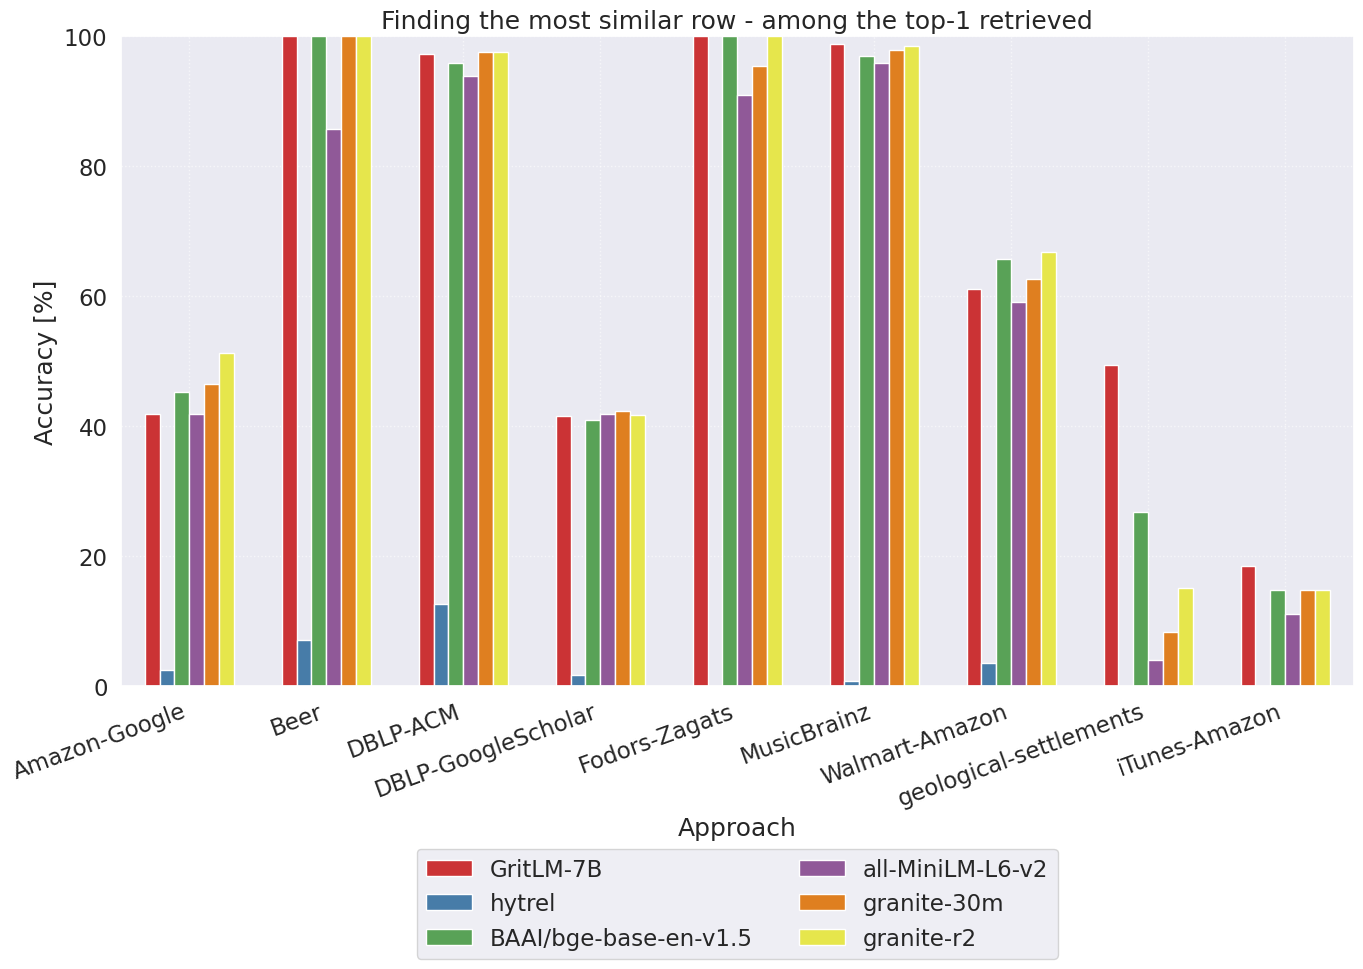

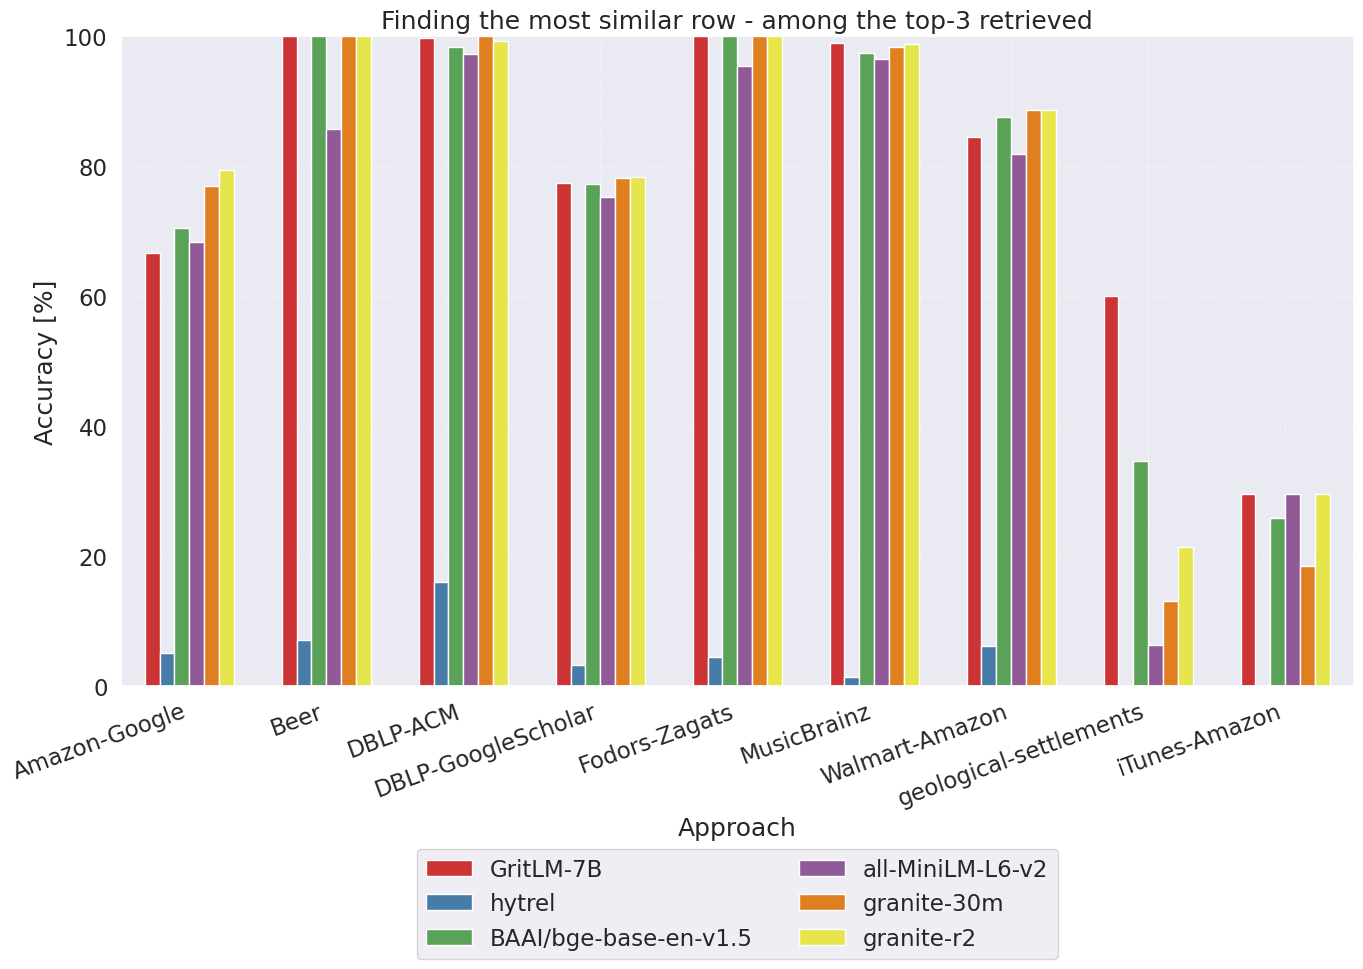

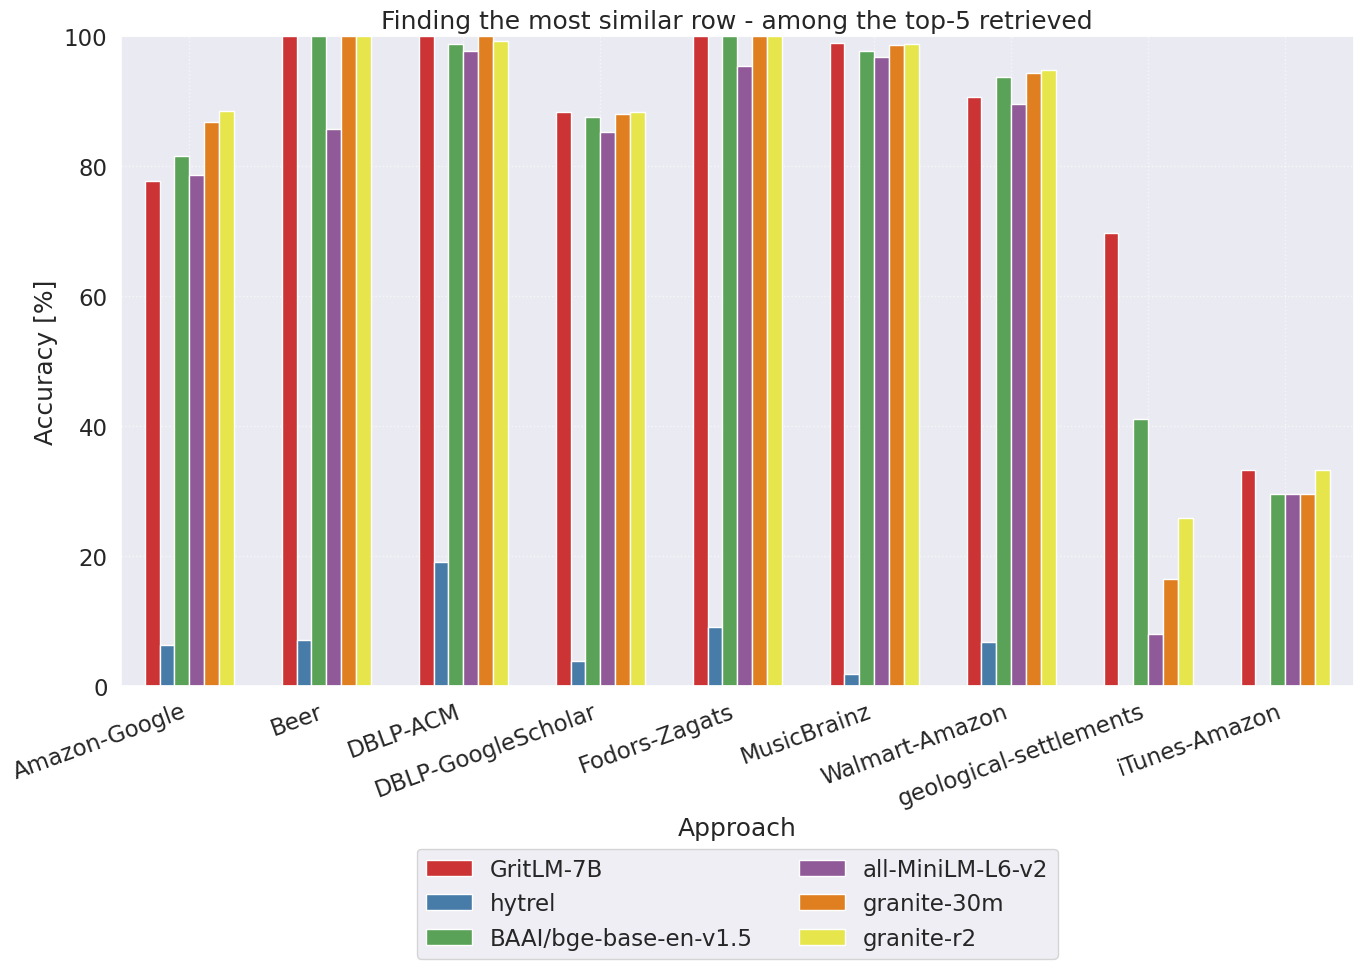

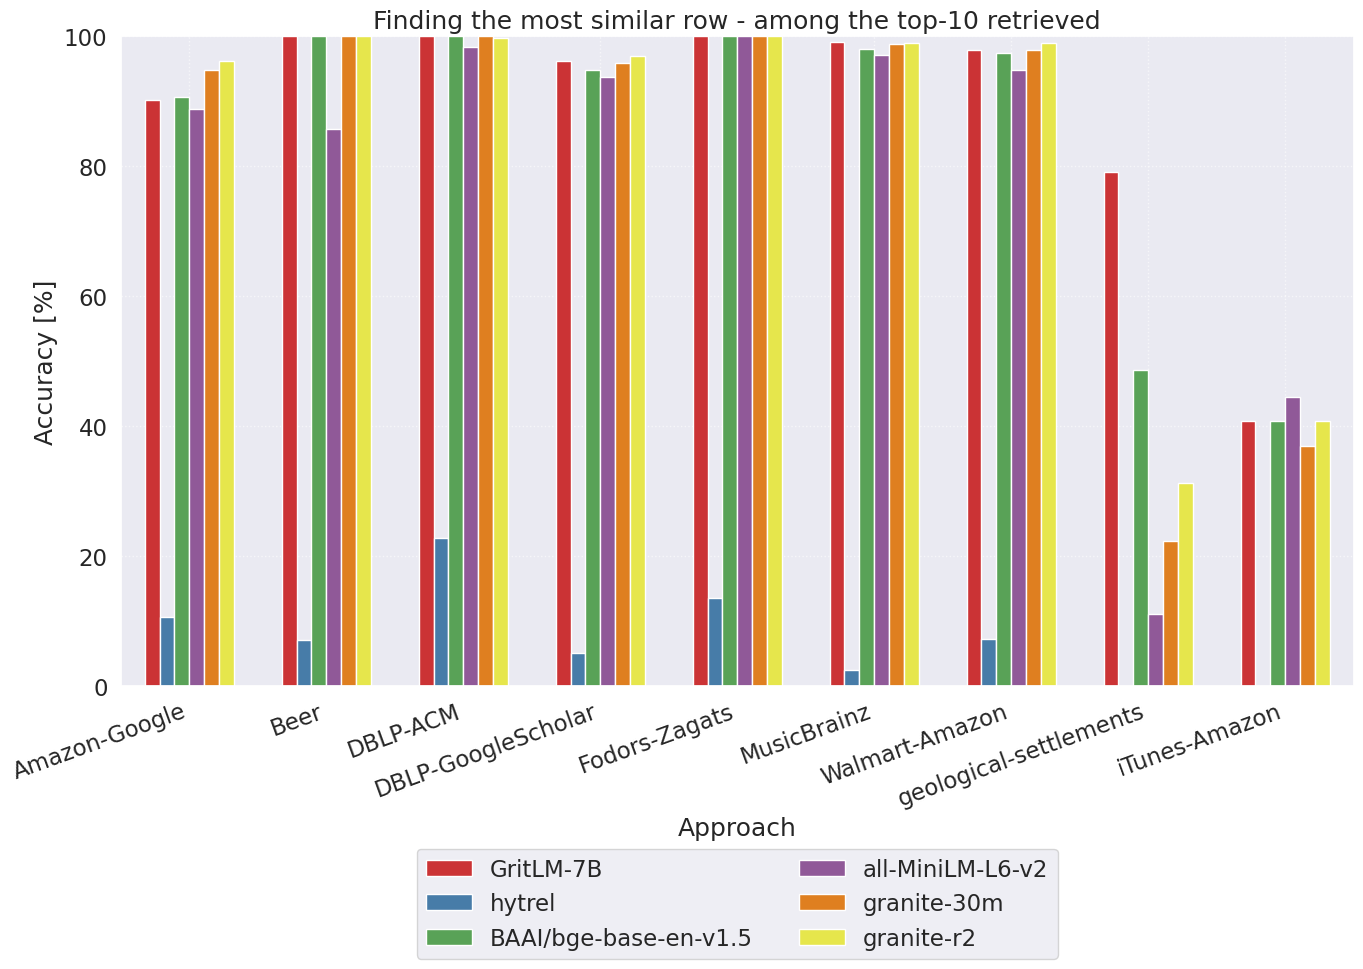

In [84]:
row_similarity_plots.create_barplot_datasets(df=filtered_task_df, results_folder=row_sim_plots_folder)


## ELO Scores

In [61]:
task_metrics_map = ranking.build_task_metrics_map(filtered_task_df)
print("Task metrics map (scores the elo metrics are based on):", task_metrics_map)

elo_df = ranking.get_elo_scores_for_task("row_similarity_search", filtered_task_df, task_metrics_map)
elo_df = elo_df.sort_values(by='elo_score_task', ascending=False)
elo_df.style

Task metrics map (scores the elo metrics are based on): {'row_similarity_search': [('In top-1 [%]_mean', True)]}
Dataset Amazon-Google, metric In top-1 [%]_mean, num_matches=15
Dataset Beer, metric In top-1 [%]_mean, num_matches=15
Dataset DBLP-ACM, metric In top-1 [%]_mean, num_matches=15
Dataset DBLP-GoogleScholar, metric In top-1 [%]_mean, num_matches=15
Dataset Fodors-Zagats, metric In top-1 [%]_mean, num_matches=15
Dataset MusicBrainz, metric In top-1 [%]_mean, num_matches=15
Dataset Walmart-Amazon, metric In top-1 [%]_mean, num_matches=15
Dataset geological-settlements, metric In top-1 [%]_mean, num_matches=15
Dataset iTunes-Amazon, metric In top-1 [%]_mean, num_matches=15


,task,Approach,Configuration,elo_score_task
5,row_similarity_search,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-english-r2,table_row_limit=100",1539.643597
0,row_similarity_search,GritLM,embedding_model=GritLM_GritLM-7B,1527.200841
4,row_similarity_search,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-30m-english,table_row_limit=100",1525.509744
2,row_similarity_search,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100",1513.586178
3,row_similarity_search,sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_limit=100",1467.203104
1,row_similarity_search,hytrel,hytrel,1426.856535


### ELO Scores who beats whom?

In [69]:
pairwise_df = ranking.compute_pairwise_wins(filtered_task_df)
pairwise_df.style

,Approach_A,Config_A,Approach_B,Config_B,num_datasets_A_beats_B
0,GritLM,embedding_model=GritLM_GritLM-7B,hytrel,hytrel,9
1,GritLM,embedding_model=GritLM_GritLM-7B,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100",5
2,GritLM,embedding_model=GritLM_GritLM-7B,sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_limit=100",7
3,GritLM,embedding_model=GritLM_GritLM-7B,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-30m-english,table_row_limit=100",4
4,GritLM,embedding_model=GritLM_GritLM-7B,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-english-r2,table_row_limit=100",3
5,hytrel,hytrel,GritLM,embedding_model=GritLM_GritLM-7B,0
6,hytrel,hytrel,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100",0
7,hytrel,hytrel,sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_limit=100",0
8,hytrel,hytrel,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-30m-english,table_row_limit=100",0
9,hytrel,hytrel,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-english-r2,table_row_limit=100",0
